In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

#### Import data and labels

In [2]:
data_path = './blind_cameras_dataset'
#neutrino-01 path: '/storage/gpfs_data/neutrino/SAND-LAr/SAND-LAr-OPTICALSIM-PROD/GRAIN/blindcam/data'
  
with open(data_path+'/simulation.npy', 'rb') as f:    #'+str(sim_num)+'
    data_in = np.load(f)
with open(data_path+'/inner_ph.npy', 'rb') as g:      #'+str(sim_num)+'
    inner_ph_in = np.load(g)

### Blinded cameras photon distribution

data shape (n_data, n_cam, cam_shape) : (1000, 54, 961)

################ process data from root file ################
inner photons shape : (54, 1000)
labelled blind : 797


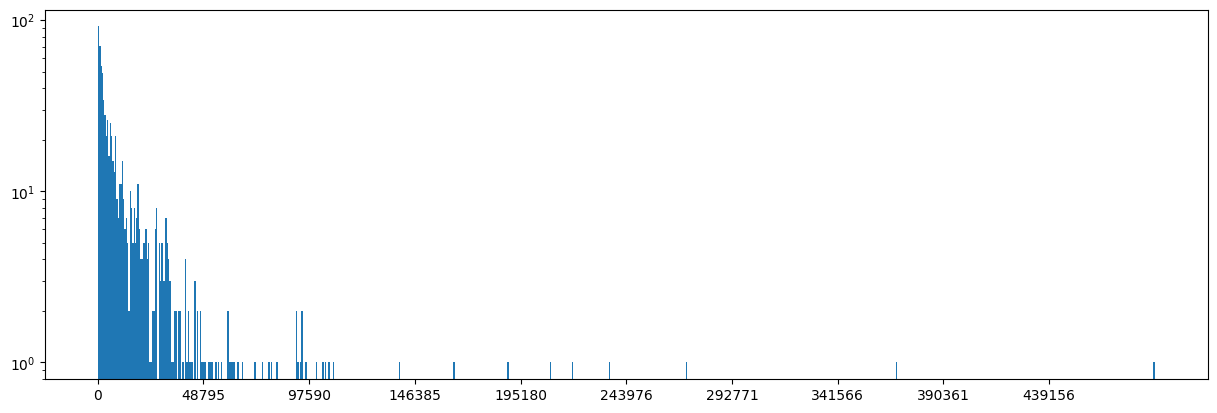

In [3]:
###### parameters #################
root_threshold = 0
###### fixed parameters ###########
n_cam_in_grain = 54
cam_side_length = 31
renormalisation = 10000
###################################

data = (data_in).reshape(-1, n_cam_in_grain, cam_side_length**2)
print('data shape (n_data, n_cam, cam_shape) :',data.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_ph_data = np.sum(data[np.where(label==1)], axis=1)
plt.figure().set_figwidth(15)
plt.hist(inner_ph_data,800)
plt.yscale('log')
step = np.max(inner_ph_data)/10
plt.xticks(np.arange(0, np.max(inner_ph_data), step=step));  # Set label locations.


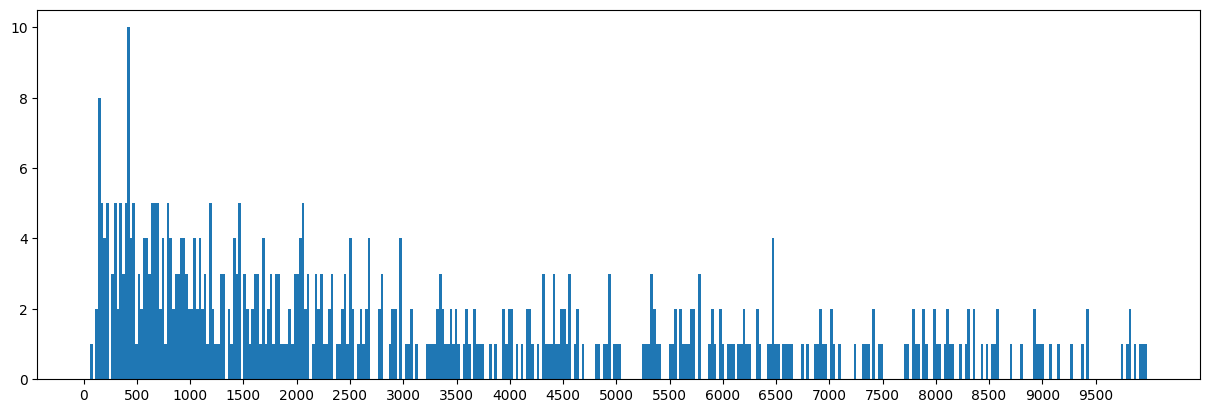

In [4]:
range = 10000

inner_ph_data = np.sum(data[np.where(label==1)], axis=1)
plt.figure().set_figwidth(15)
plt.hist(inner_ph_data[inner_ph_data<range],400)
#plt.yscale('log')
step = range/20
plt.xticks(np.arange(0, range, step=step));  # Set label locations.


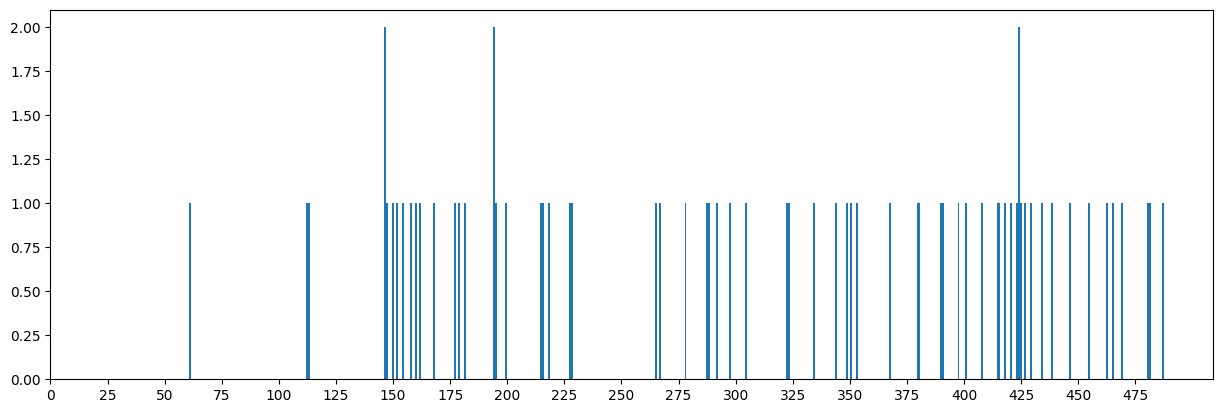

In [5]:
range = 500

inner_ph_data = np.sum(data[np.where(label==1)], axis=1)
plt.figure().set_figwidth(15)
plt.hist(inner_ph_data[inner_ph_data<range],500)
#plt.yscale('log')
step = range/20
plt.xticks(np.arange(0, range, step=step));  # Set label locations.

### Blinded cameras distribution after cuts

data shape (n_data, n_cam, cam_shape) : (1000, 54, 961)

################ process data from root file ################
inner photons shape : (54, 1000)
labelled blind : 716


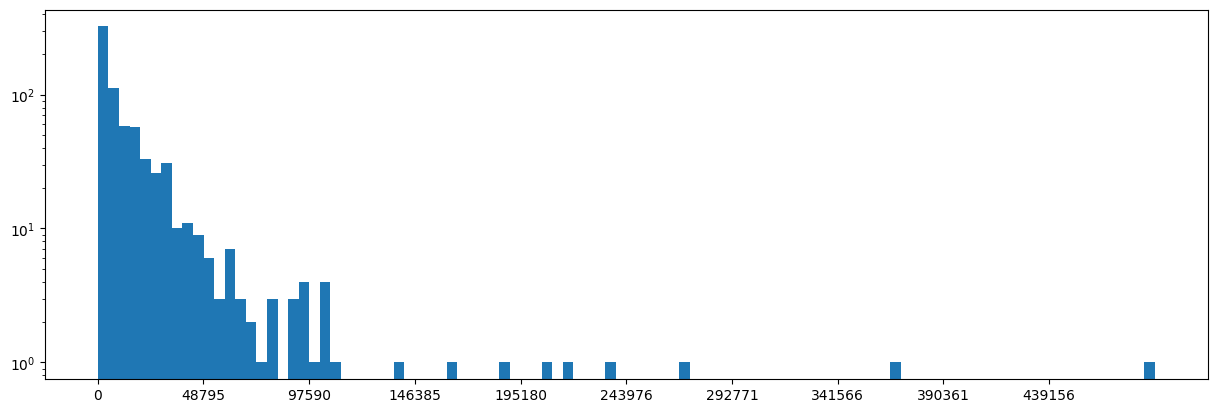

In [6]:
###### parameters #################
root_threshold = 20
###### fixed parameters ###########
n_cam_in_grain = 54
cam_side_length = 31
renormalisation = 10000
###################################

data = (data_in).reshape(-1, n_cam_in_grain, cam_side_length**2)
print('data shape (n_data, n_cam, cam_shape) :',data.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_ph_data = np.sum(data[np.where(label==1)], axis=1)
plt.figure().set_figwidth(15)
plt.hist(inner_ph_data,100)
plt.yscale('log')
step = np.max(inner_ph_data)/10
plt.xticks(np.arange(0, np.max(inner_ph_data), step=step));  # Set label locations.

### Pick amplitude / amplitude distribution for each camera

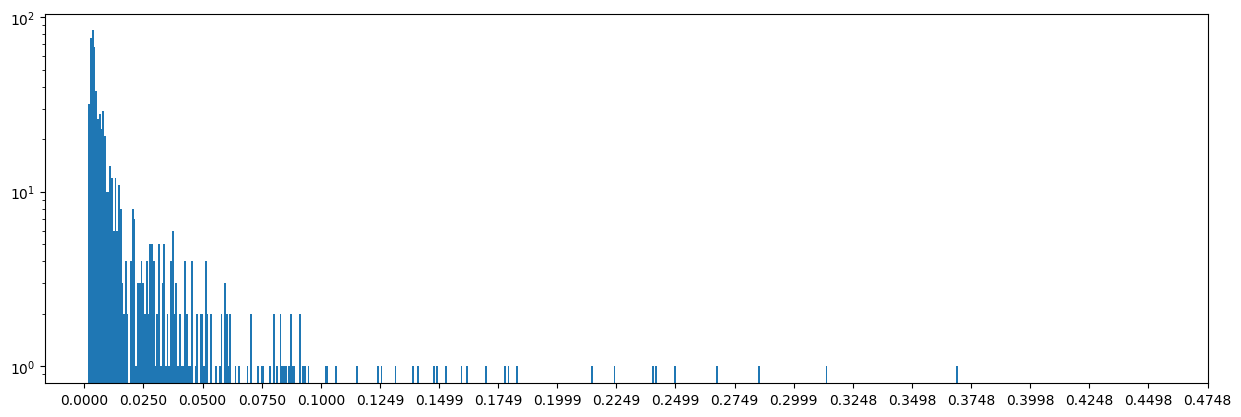

In [7]:
inner_ph_max = np.max(data[np.where(label==1)], axis=1)
ratio = inner_ph_max/inner_ph_data
plt.figure().set_figwidth(15)
plt.hist(ratio[ratio < np.max(ratio)],500)
plt.yscale('log')

#plt.yscale('log')
step = np.max(ratio)/20
plt.xticks(np.arange(0, np.max(ratio), step=step));  # Set label locations.

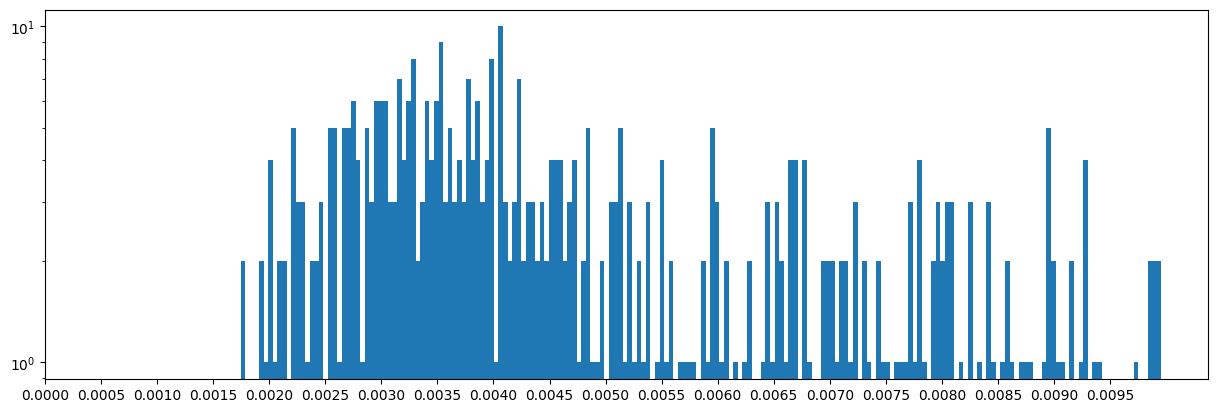

In [9]:
range = 0.01

inner_ph_max = np.max(data[np.where(label==1)], axis=1)
ratio = inner_ph_max/inner_ph_data
plt.figure().set_figwidth(15)
plt.hist(ratio[ratio < range],200)
plt.yscale('log')

#plt.yscale('log')
step = range/20
plt.xticks(np.arange(0, range, step=step));  # Set label locations.

### Scatter Plots

Text(0, 0.5, 'camera maximum')

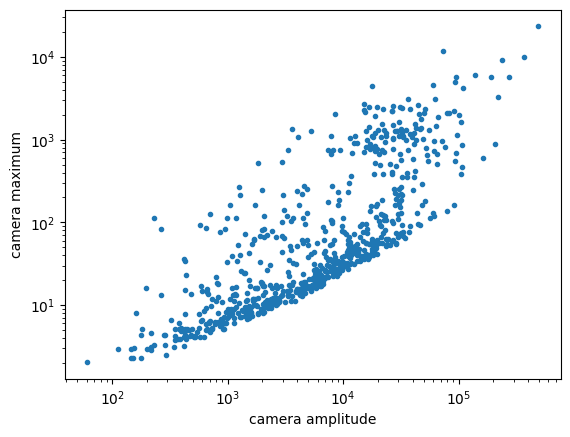

In [13]:
plt.plot(inner_ph_data, inner_ph_max, '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera amplitude')
plt.ylabel('camera maximum')

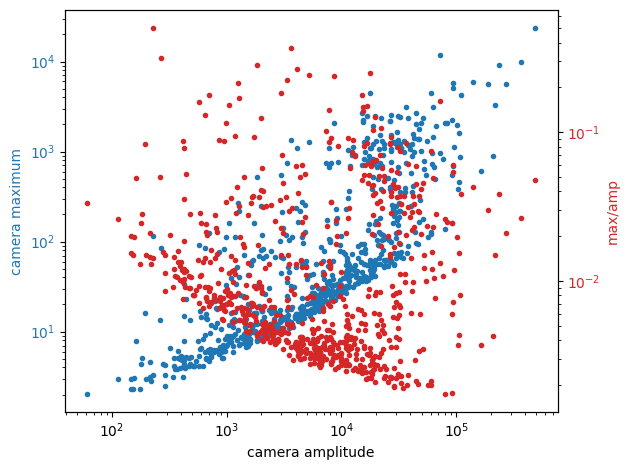

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('camera amplitude')
ax1.set_ylabel('camera maximum', color=color)
ax1.plot(inner_ph_data, inner_ph_max, '.', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

plt.xscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('max/amp', color=color)  # we already handled the x-label with ax1
ax2.plot(inner_ph_data, ratio, '.', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0, 0.5, 'max/amp')

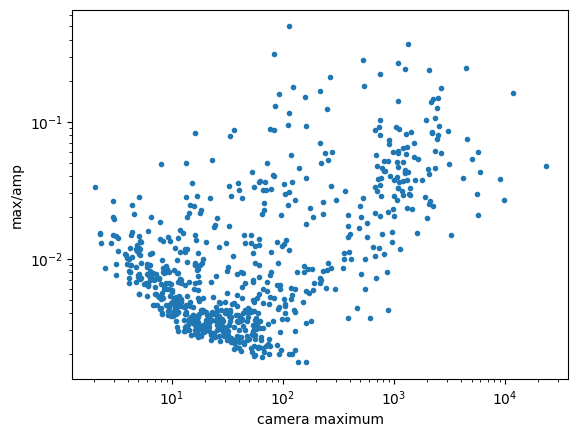

In [22]:
plt.plot(inner_ph_max, ratio, '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('max/amp')

### Usage of mean

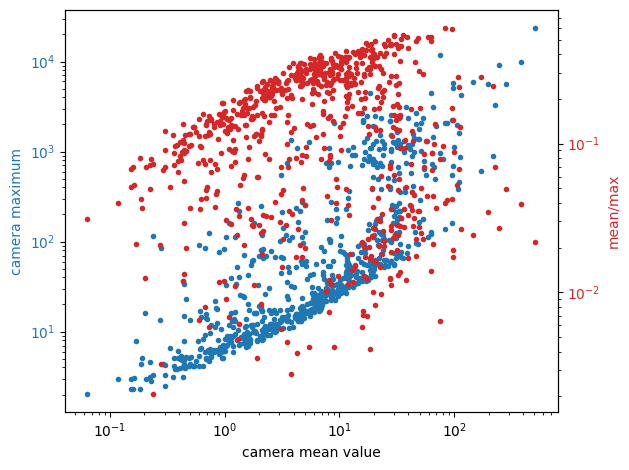

In [28]:
inner_ph_mean = np.mean(data[np.where(label==1)], axis=1)
ratio_mean = inner_ph_mean/inner_ph_max

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('camera mean value')
ax1.set_ylabel('camera maximum', color=color)
ax1.plot(inner_ph_mean, inner_ph_max, '.', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

plt.xscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('mean/max', color=color)  # we already handled the x-label with ax1
ax2.plot(inner_ph_mean, ratio_mean, '.', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()